C:\Users\user\AppData\Local\Temp\ipykernel_17196\1401045772.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df6, palette='pastel')
) missing from font(s) DejaVu Sans.ykernel_17196\1401045772.py:63: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.ckages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


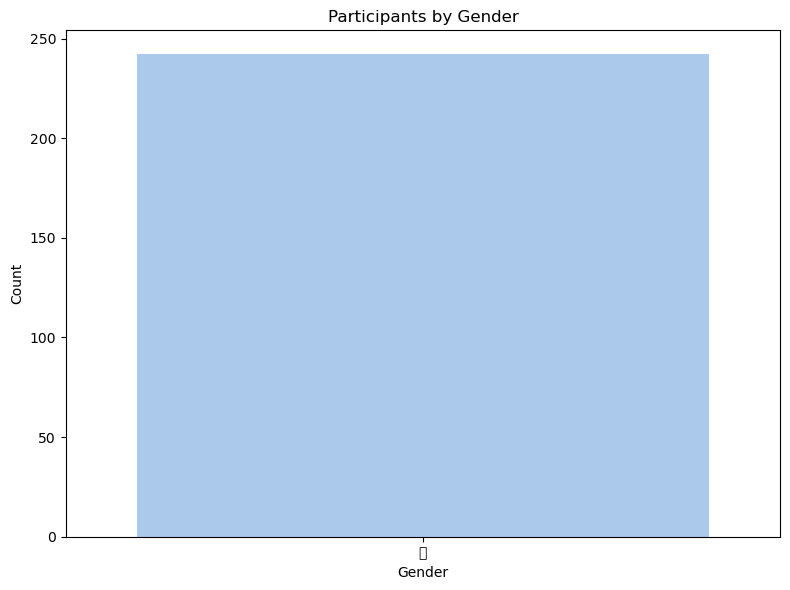

In [131]:
#ATTEMPT 1
#IN THIS ATTEMPT THE CODE IS COMPLETELY SAME AS THE ONE PROVIDED IN THE MANUAL


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.hubertiming.com/results/2025Lilac"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)

rows = soup.find_all('tr')

for x in rows:
    row_data = soup.find_all('td')

row_str = str(row_data)
clean_row = BeautifulSoup(row_str, "lxml").get_text()

cleaned_data = []
tag_remover = re.compile(r'<.*?>')
for row in rows:
    row_str = str(row)
    clean_row = tag_remover.sub('', row_str)
    clean_row = clean_row.strip().split('\n')
    cleaned_data.append(clean_row)

df = pd.DataFrame(cleaned_data)

col_labels = soup.find_all('th')
all_header = [th.get_text(strip=True) for th in col_labels]

df_header = pd.DataFrame([all_header])
frames = [df_header, df]
df3 = pd.concat(frames, ignore_index=True)

df4 = df3.rename(columns=df3.iloc[0])
df5 = df4.dropna(axis=0, how='any')
df6 = df5.drop(df5.index[0])

df6.to_csv("assignment.csv", index=True, encoding=None)

data = pd.read_csv('assignment.csv')

if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

data.columns = data.columns.str.strip()
data['Name'] = data['Name'].str.strip().str.replace(r'\r\n', '', regex=True)

data.to_csv('assignmentV2.csv', index=False)

plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df6, palette='pastel')
plt.title('Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17196\4098226533.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df5, palette='pastel')


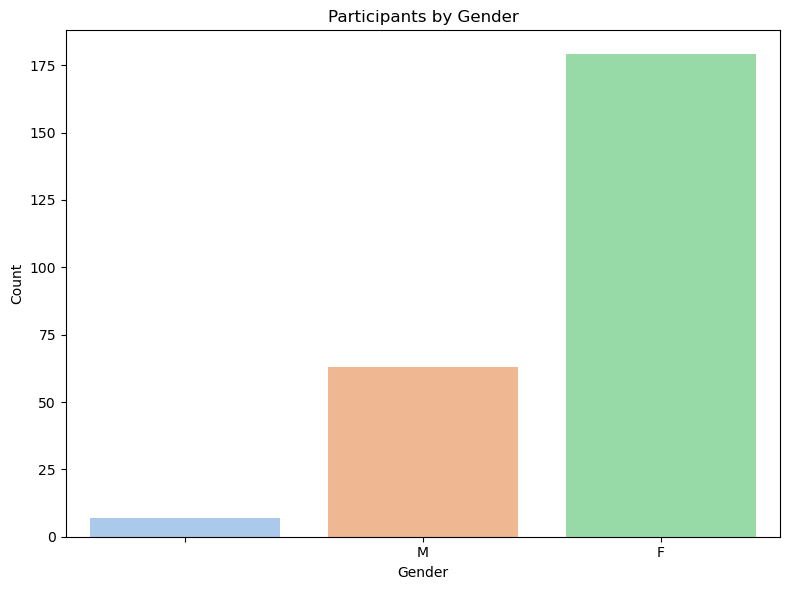

In [129]:
#ATTEMPT 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.hubertiming.com/results/2025Lilac"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

rows = soup.find_all('tr')

cleaned_data = []
tag_remover = re.compile(r'<.*?>')
for row in rows:
    row_str = str(row)
    clean_row = tag_remover.sub('', row_str)
    clean_row = clean_row.strip().split('\n')
    clean_row = [item.strip() for item in clean_row if item.strip()]
    cleaned_data.append(clean_row)

df = pd.DataFrame([row for row in cleaned_data if row])

col_labels = soup.find_all('th')
all_header = [th.get_text(strip=True) for th in col_labels]

df_header = pd.DataFrame([all_header])
frames = [df_header, df]
df3 = pd.concat(frames, ignore_index=True)

df4 = df3.rename(columns=df3.iloc[0])
df5 = df4.drop(df4.index[0])
df5 = df5.reset_index(drop=True)

df5.columns = df5.columns.str.strip()
for col in df5.columns:
    df5[col] = df5[col].astype(str).str.strip().str.replace(r'\r|\n', '', regex=True)

if 'Time' in df5.columns:
    df5.rename(columns={'Time': 'FinishTime'}, inplace=True)
elif 'Gun Time' in df5.columns:
    df5.rename(columns={'Gun Time': 'FinishTime'}, inplace=True)

if 'Gender' in df5.columns:
    df5['Gender'] = df5['Gender'].str.replace(r'[^MF]', '', regex=True)

if 'Age' in df5.columns:
    df5['Age'] = pd.to_numeric(df5['Age'], errors='coerce')

if 'FinishTime' in df5.columns:
    df5['FinishTime_sec'] = pd.to_timedelta(df5['FinishTime'], errors='coerce').dt.total_seconds()

df5.to_csv('assignmentV5.csv', index=False)

plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df5, palette='pastel')
plt.title('Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
